## Liner Regression Model Implementation on Boston House Price Dataset

### Activities
- Data Pre-processing
- EDA/FE
- Data Standardisation
- Model preparation
- Accuracy check
- Prediction using the model
- Picking

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'seaborn'

#### Loading the dataset

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()
type(boston)

C:\Users\subho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

sklearn.utils._bunch.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

#### Checking the 'DESCR' feature

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

#### Preparing th dataset

In [8]:
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Adding the target feature in the dataset

In [9]:
data['Price']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Basic info of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Observation
- There are 14 rows and 506 columns
- All columns are of float tyoe
- No null values present

#### Summarizing the dataset with basic stats

In [12]:
data.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
CRIM,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Missing Values

In [13]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

#### Observation
- No Missing values in the dataset

### EDA, Graphical Analysis

##### Correlation

In [14]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


##### Visualising the correlation with heatmap

<AxesSubplot:>

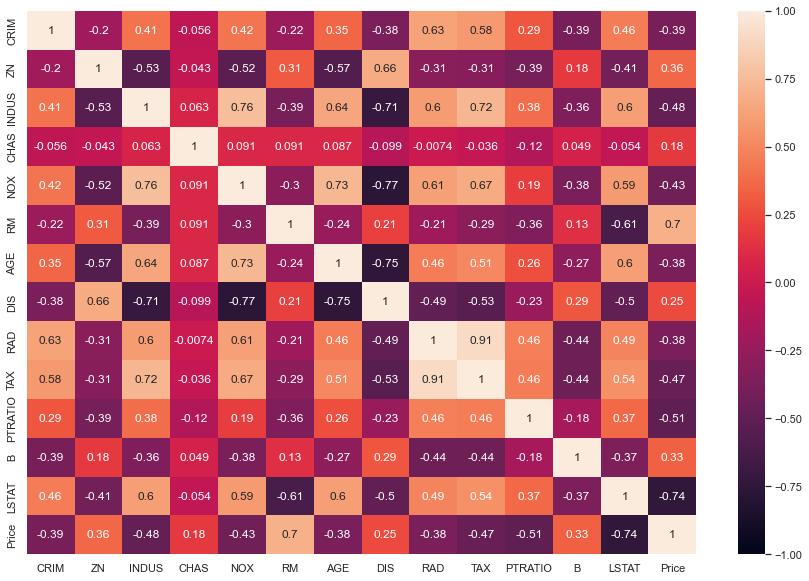

In [18]:
#sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data.corr(),vmin=-1,vmax=1,annot=True)

##### Visualising the correlation with pairplot

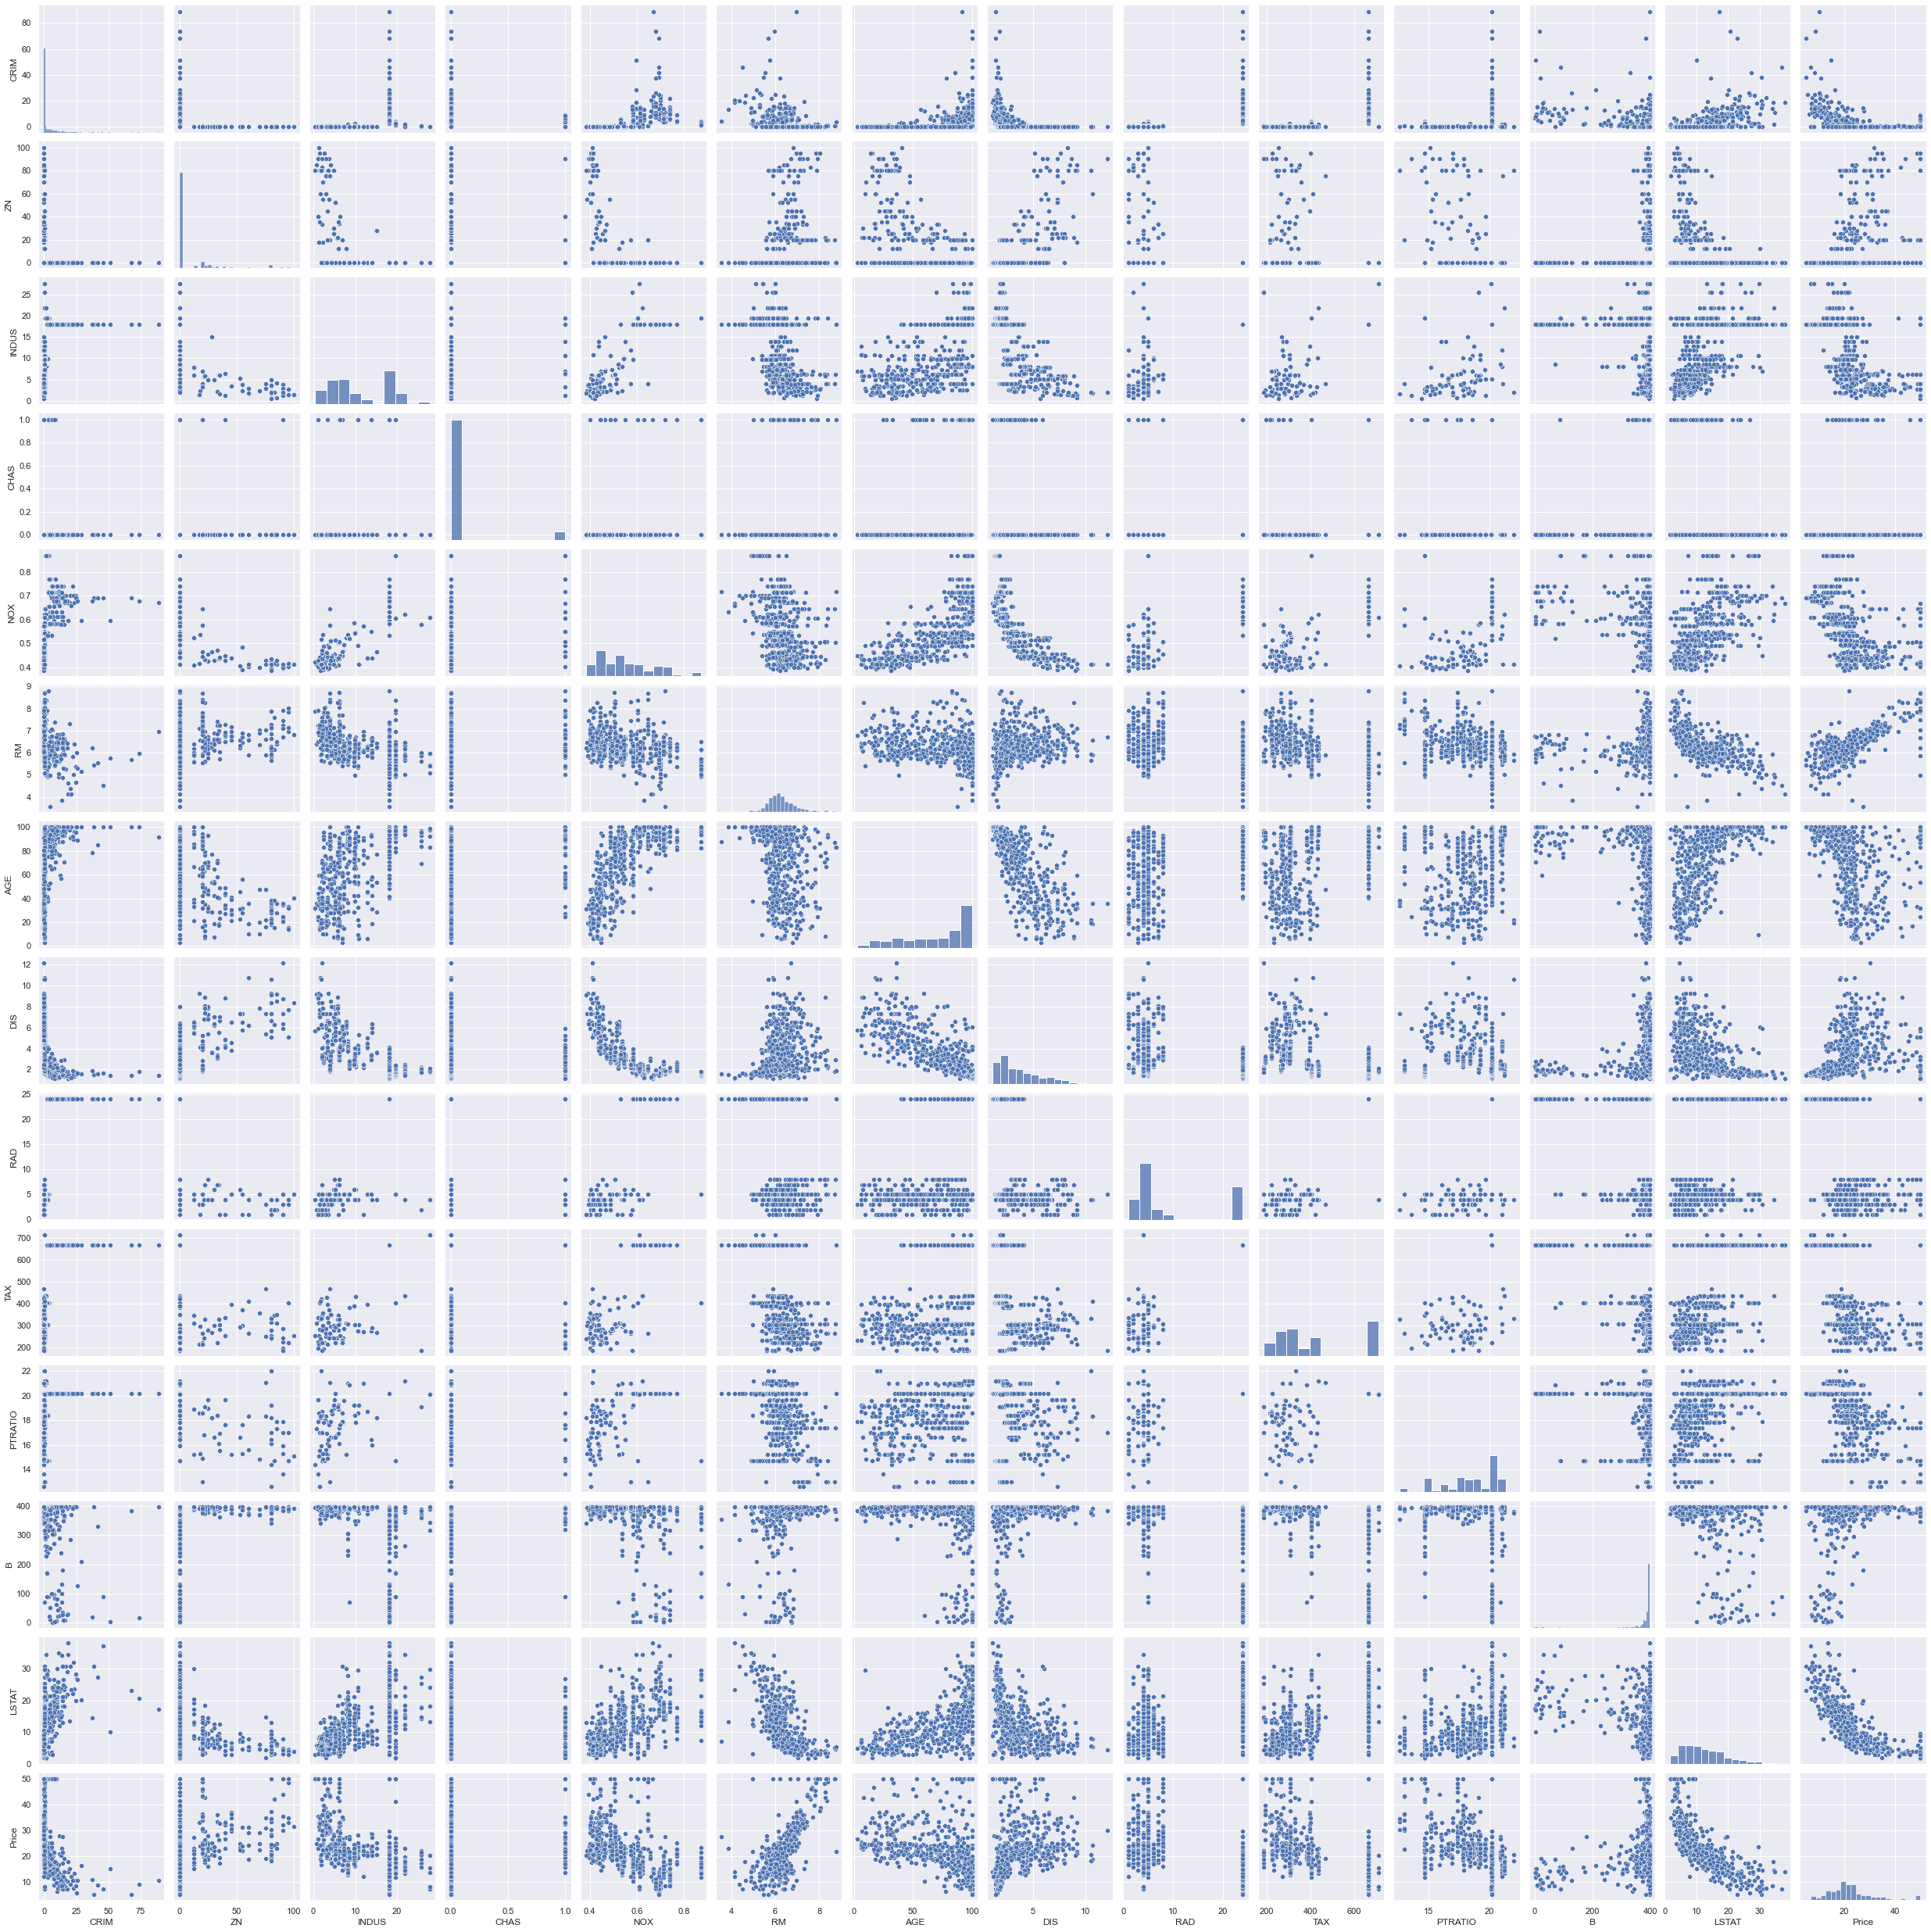

In [20]:
sns.set(rc={'figure.figsize':(15,10)})
sns.pairplot(data=data)

##### Visualising the relationships between Price and rest of the features with scatterplot

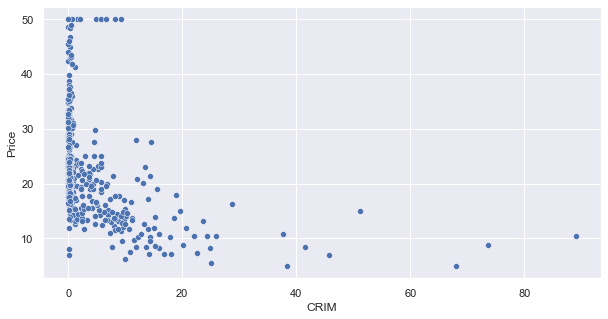

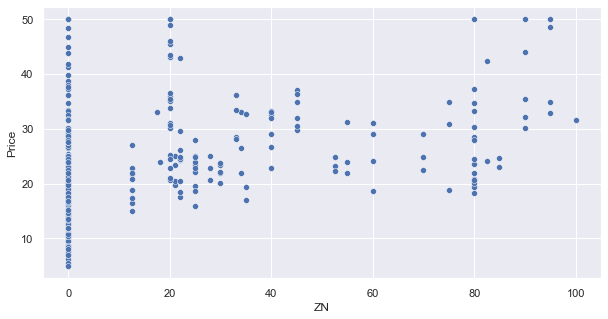

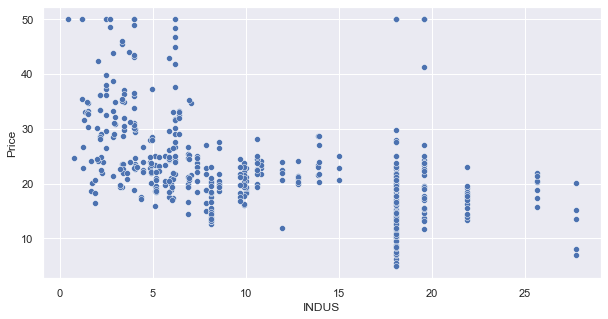

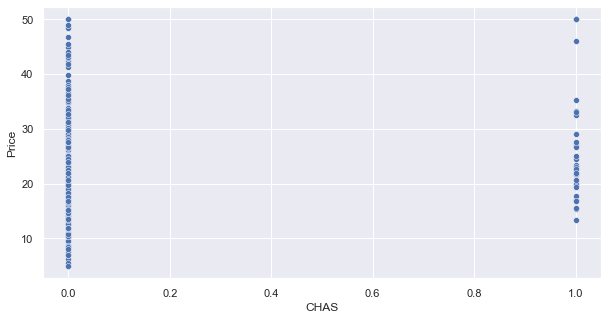

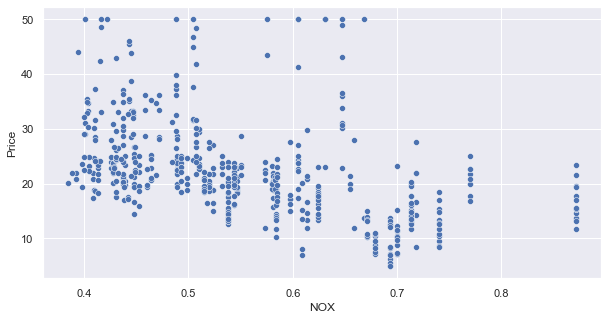

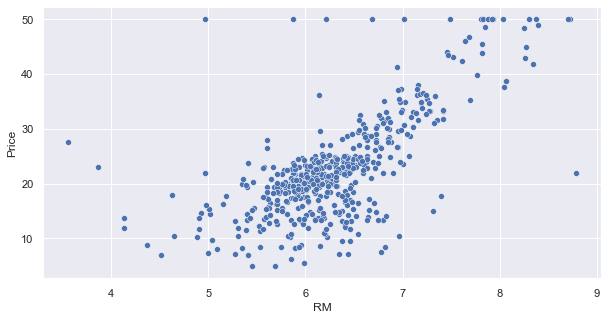

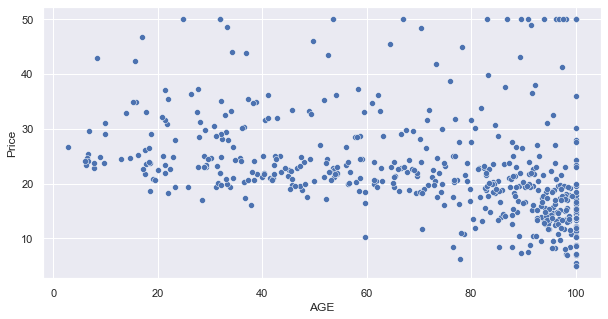

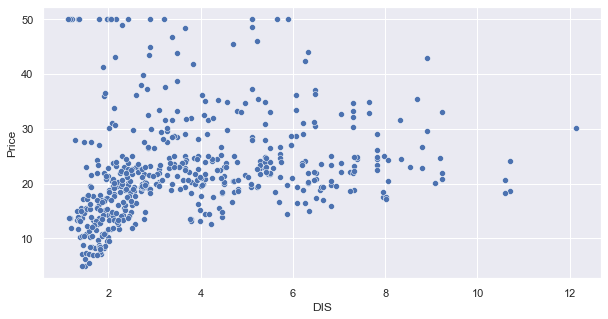

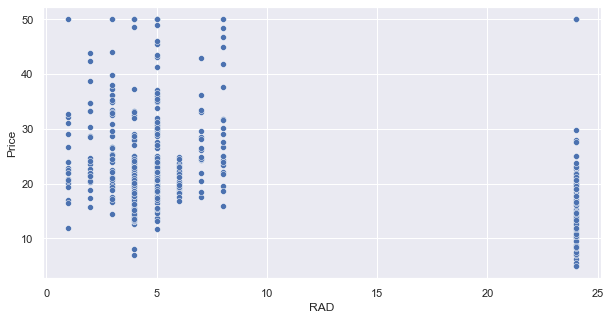

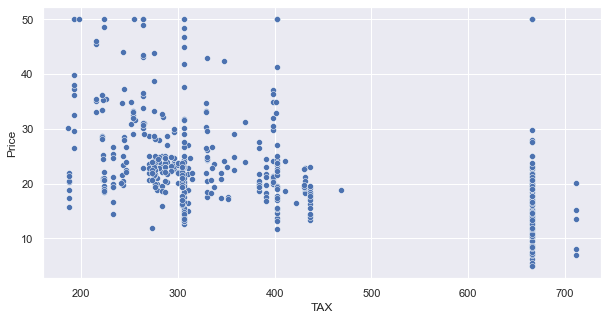

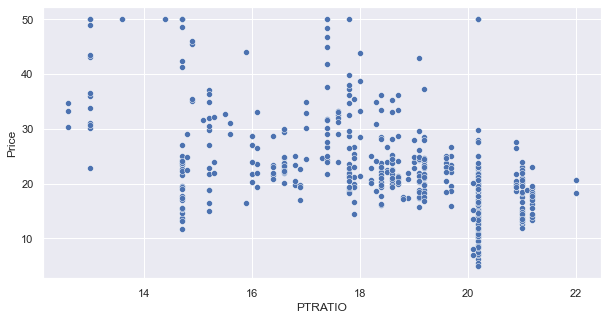

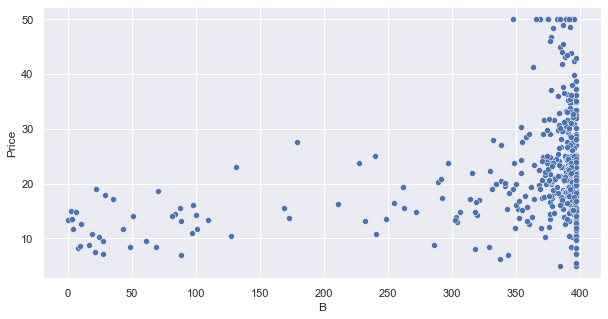

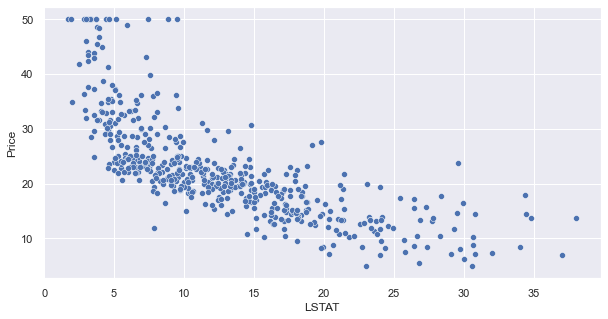

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
for features in data:
    if features !='Price':
        sns.scatterplot(data=data,x=features,y='Price')
        plt.show()

#### Observation
- CRIM, DIS, NOX, LSTAT are negatively correlated with Price
- RM, AGE are positively correlated with Price

##### Visualisation with Regression plot

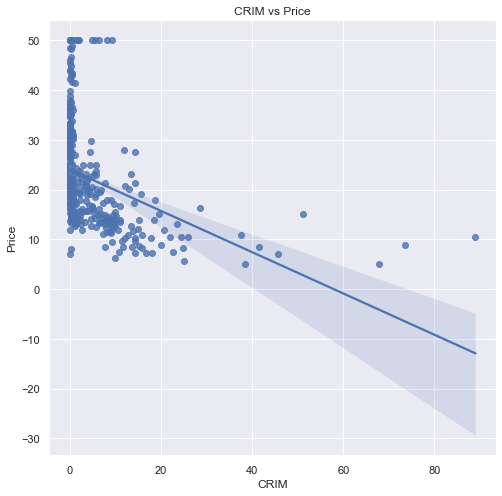

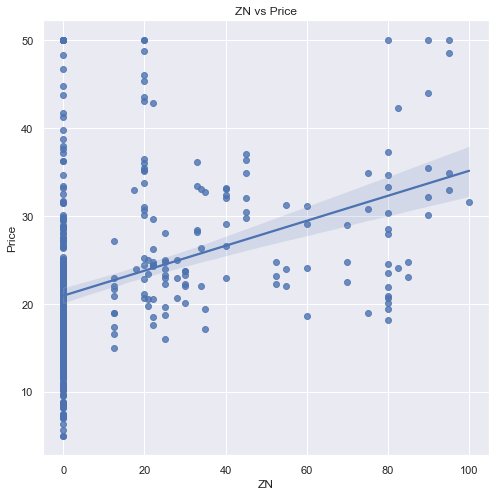

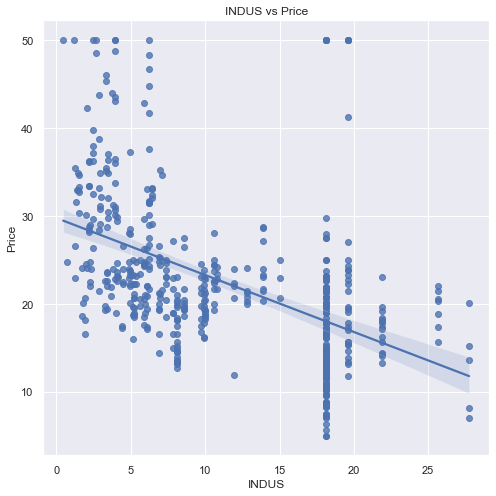

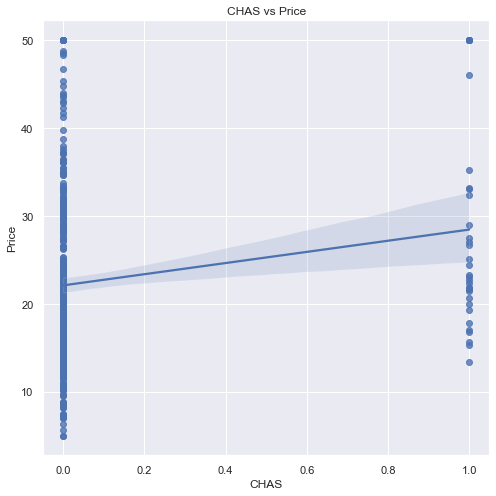

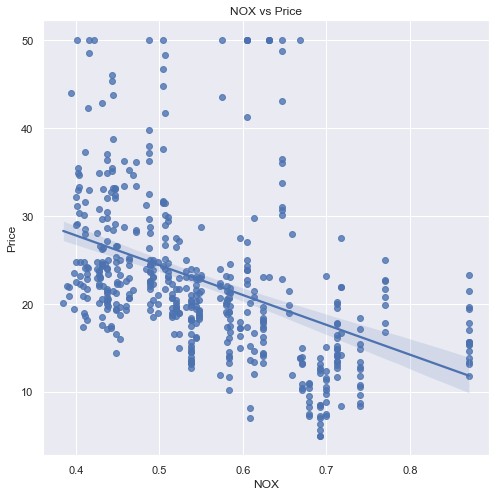

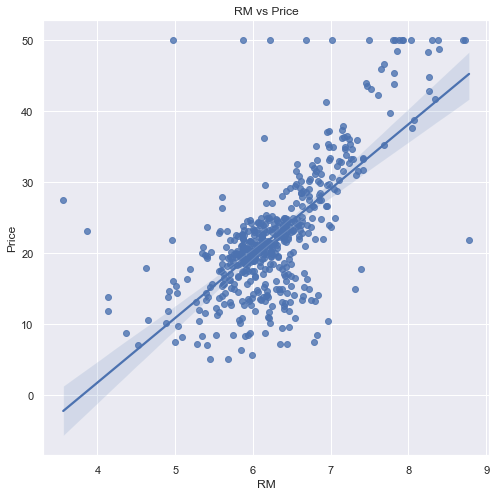

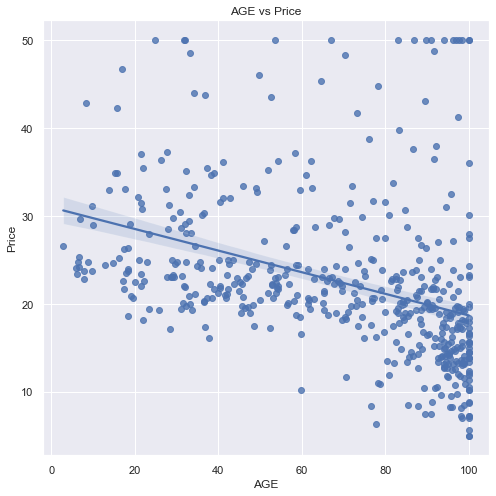

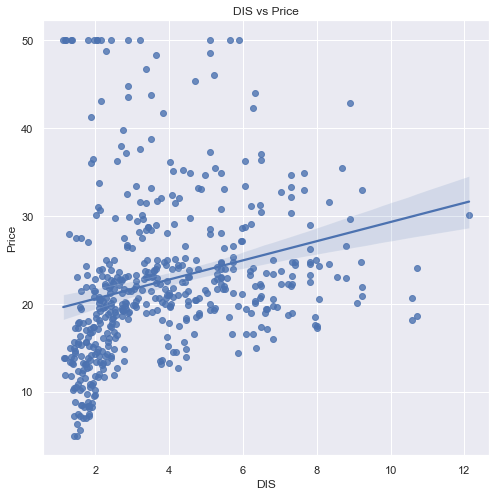

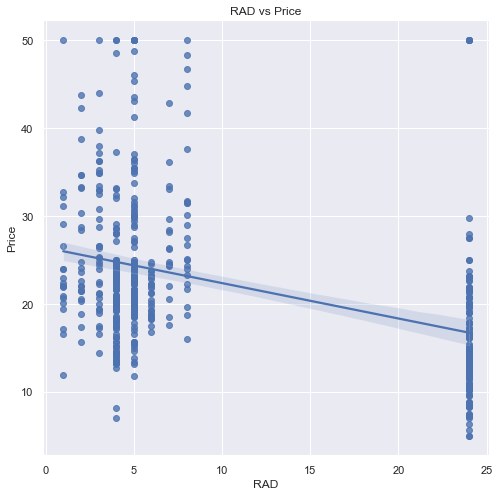

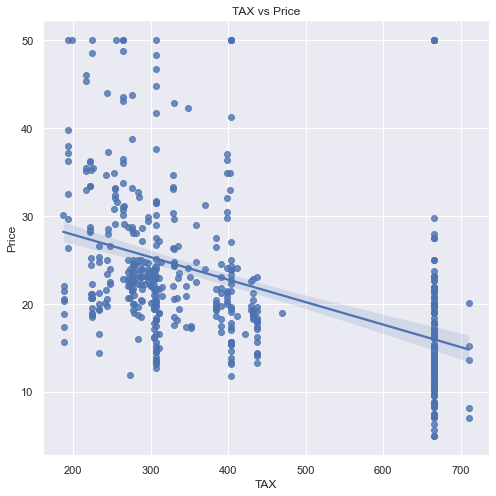

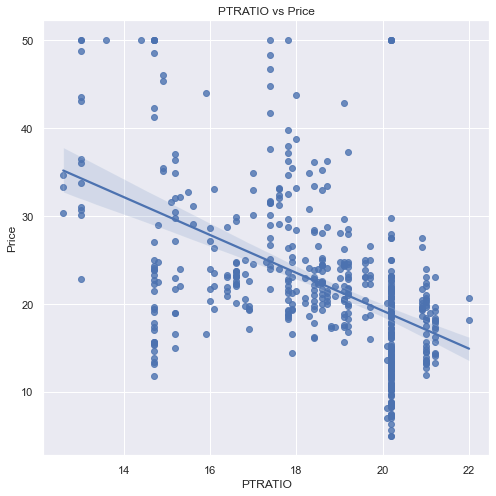

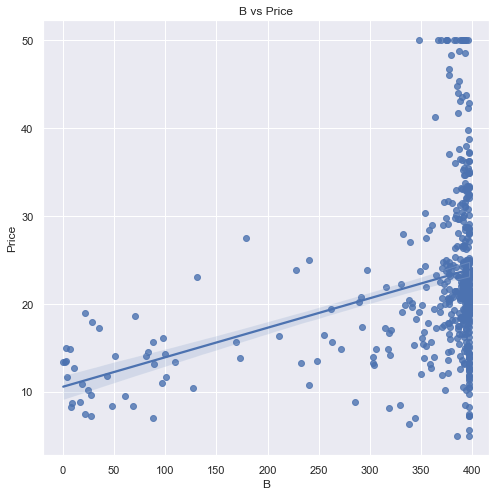

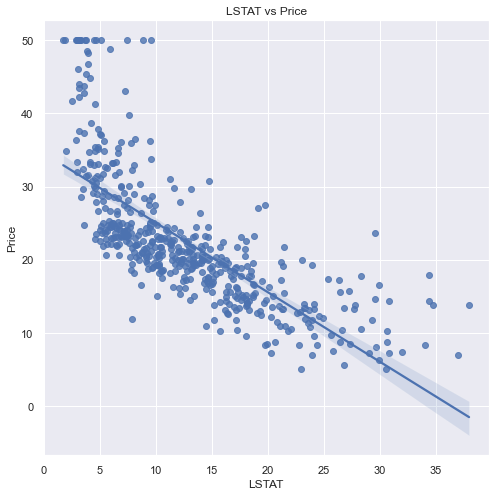

In [28]:
for features in data:
    if features !='Price':
        sns.set(rc={'figure.figsize':(8,8)})
        sns.regplot(data=data,x=features,y='Price')
        plt.title(f'{features} vs Price')
        plt.show()

##### Checking the outliers with boxplot

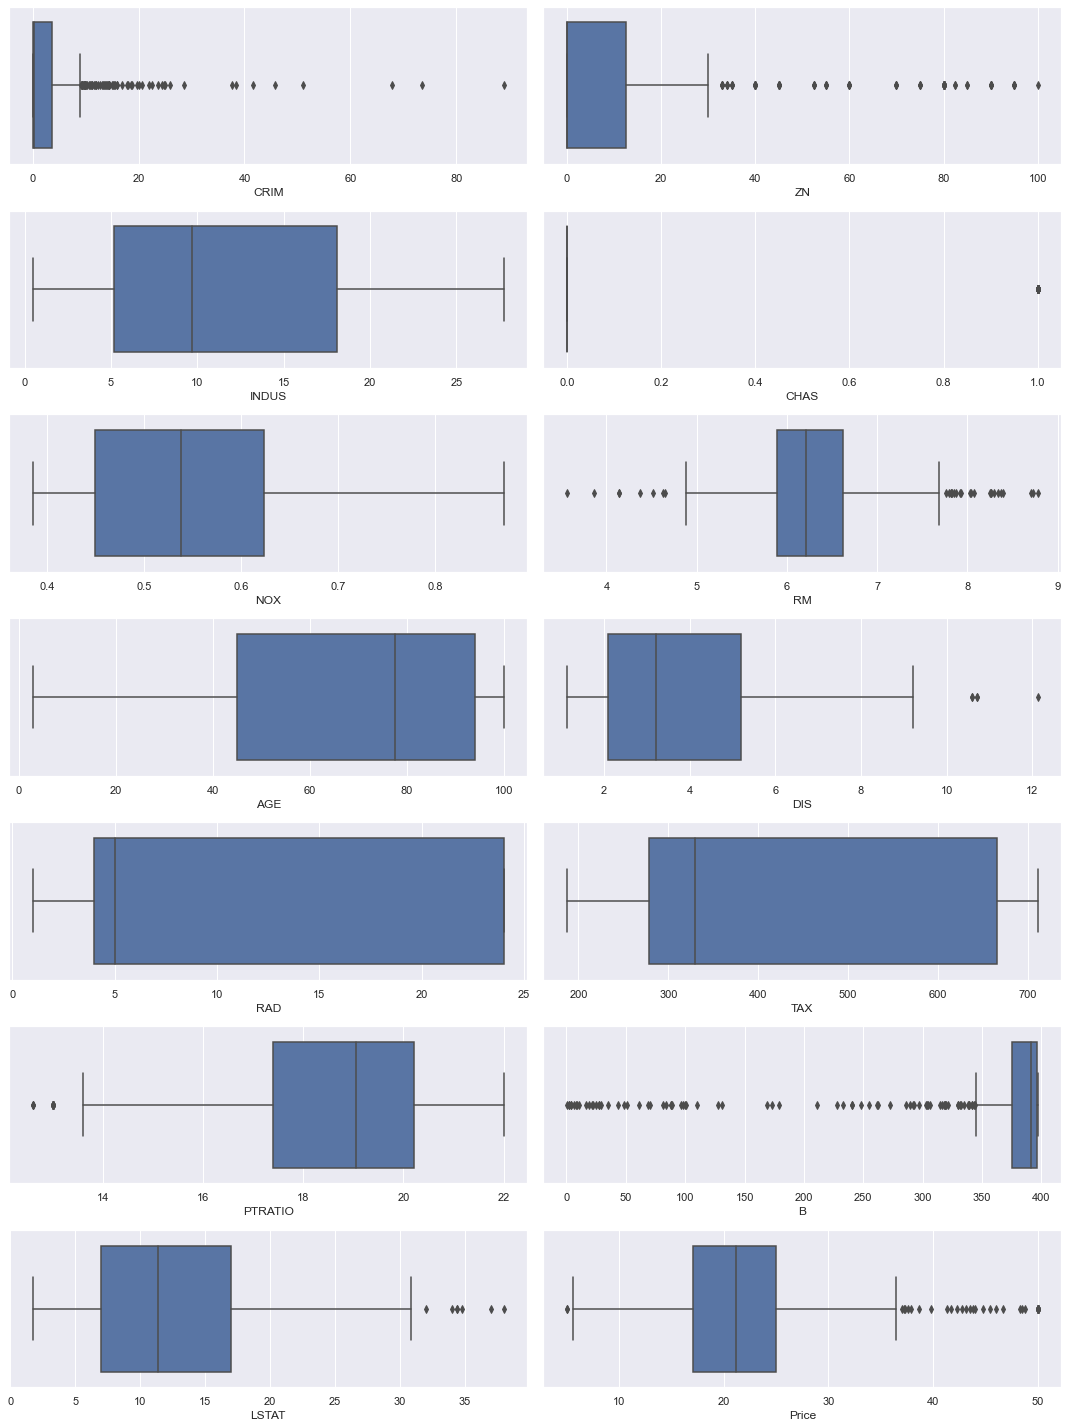

In [38]:
pn=1
plt.figure(figsize=(15,20))
for features in data:
    plt.subplot(7,2,pn)
    sns.boxplot(data=data,x=features)
    pn+=1
    plt.tight_layout()

#### Observation
- CRIM, ZN, B, Price features have a lot of outliers

### Model Building

#### Splitting the dependent and independent features

In [46]:
X=data.drop(columns='Price')
y=data.iloc[:,-1]

In [47]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [48]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

#### Train test split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [50]:
X_train.shape

(339, 13)

In [52]:
y_train.shape

(339,)

#### Standardizinz the dataset

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [54]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Training

In [55]:
from sklearn.linear_model import LinearRegression
LG=LinearRegression()

In [56]:
LG.fit(X_train,y_train)

LinearRegression()

#### Co-efficients and intercepts

In [60]:
print(f'Linear regression co-efficient is {LG.coef_}')
print(f'Linear regression intercept is {LG.intercept_}')

Linear regression co-efficient is [-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]
Linear regression intercept is 22.077286135693214


#### Parameters on which the model has been trained

In [62]:
LG.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

#### Predicting using test data

In [64]:
LG_predict=LG.predict(X_test)
LG_predict

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

#### Visualising the accuracy of the predicted data using scatter plot

Text(0.5, 1.0, 'Actual vs Predicted plot')

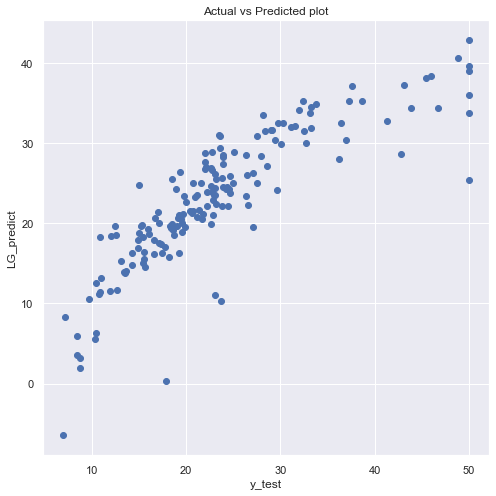

In [66]:
plt.scatter(y_test,LG_predict)
plt.xlabel('y_test')
plt.ylabel('LG_predict')
plt.title('Actual vs Predicted plot')

##### Observation
- Actual and predicted values are almost linear indicating a good model

#### Calculating residuals

In [67]:
residual=y_test-LG_predict
residual

305   -3.038496
193   -0.887944
65    -7.498956
349    4.286033
151    0.705072
         ...   
442   -1.004380
451   -4.387684
188   -2.638009
76    -2.661709
314   -1.885761
Name: Price, Length: 167, dtype: float64

#### Plotting the residuals

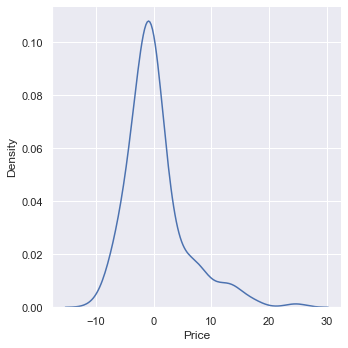

In [69]:
sns.displot(residual,kind='kde')

##### Observation
- The residuals are normally distributed indicating a good model

#### Plotting the predicted data and residuals

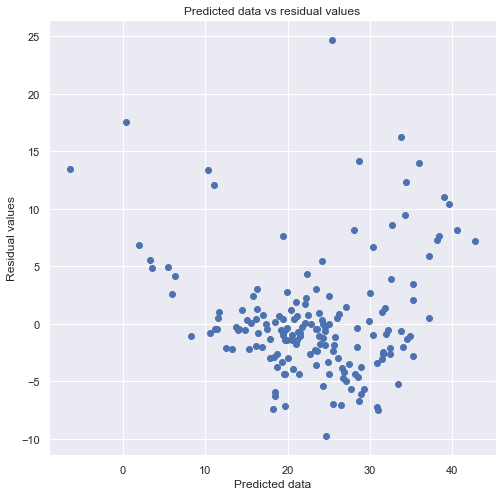

In [71]:
plt.scatter(LG_predict,residual)
plt.xlabel('Predicted data')
plt.ylabel('Residual values')
plt.title('Predicted data vs residual values')
plt.show()

##### Observation
- Uniform distribution between predicted values and residuals indicate a good model

### Model Accuracy

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'Mean squared error of the model is {mean_squared_error(y_test,LG_predict)}')
print(f'Mean absolute error of the model is {mean_absolute_error(y_test,LG_predict)}')
print(f'Root Mean sqaured error of the model is {np.sqrt(mean_squared_error(y_test,LG_predict))}')

Mean squared error of the model is 27.100991709962493
Mean absolute error of the model is 3.5206585298797926
Root Mean sqaured error of the model is 5.205861284164465


#### R Square and Adjusted R Square Values

In [78]:
from sklearn.metrics import r2_score
LG_r2=r2_score(y_test,LG_predict)
print('Linear regression R square value is',round(LG_r2*100.00,3))
adj_LG_r2=1-((1-LG_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_LG_r2*100.00,3))

Linear regression R square value is 71.652
Adjusted R2 score is 69.244


### Prediction of new data

In [79]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

#### Reshaping the data to fit into our model

In [81]:
new_data=boston.data[0].reshape(1,-1)
new_data

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

#### Standardizing the data

In [82]:
new_data=scaler.transform(new_data)
new_data

C:\Users\subho\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42251595,  0.25952683, -1.31408844, -0.25039154, -0.15122027,
         0.48050262, -0.12063746,  0.12971027, -0.9920797 , -0.68061821,
        -1.49983144,  0.44765291, -1.12571434]])

#### Predicting the output

In [85]:
print(f'Predicted out put is {LG.predict(new_data)[0]}')

Predicted out put is 30.258529338072275


### Pickiling the Model file for Deployment

In [86]:
import pickle

In [87]:
pickle.dump(LG,open('regmodel.pkl','wb'))

In [89]:
picked_model=pickle.load(open('regmodel.pkl','rb'))

#### Predicting the output using the pickle file

In [91]:
print(f'Output using the picked file is {picked_model.predict(new_data)[0]}')

Output using the picked file is 30.258529338072275
